<a href="https://colab.research.google.com/github/chrismckie/CSCI164/blob/main/CSCI164Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Initialize pandas
import pandas as pd

In [ ]:
# Dataset 1: Loan Default Predictions

In [2]:
# Load the dataset
loan_df = pd.read_csv('accepted_2007_to_2018Q4.csv', nrows=20000)

# Only keep loans that are either Fully Paid or Charged Off
loan_df = loan_df[loan_df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
# Map 'Fully Paid' = 1 and 'Charged Off' = 0
loan_df['loan_status'] = loan_df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

print("Loan data shape: ", loan_df.shape)
loan_df.head()

<ipython-input-2-ce8d4a3e9068>:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('accepted_2007_to_2018Q4.csv', nrows=20000)


Loan data shape:  (17725, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check missing values
print(loan_df.isnull().sum())

id                           0
member_id                17725
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
                         ...  
settlement_status        17145
settlement_date          17145
settlement_amount        17145
settlement_percentage    17145
settlement_term          17145
Length: 151, dtype: int64


In [4]:
# Preprossing

# Drop unnecessary features from the dataset
keep_cols = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
    'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
    'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'open_acc', 'pub_rec',
    'revol_bal', 'revol_util', 'total_acc', 'loan_status'
]

# Keep only the features that are relevant
loan_df = loan_df[keep_cols]

loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,dti,delinq_2yrs,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,...,5.91,0.0,675.0,679.0,7.0,0.0,2765.0,29.7,13.0,1
1,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,...,16.06,1.0,715.0,719.0,22.0,0.0,21470.0,19.2,38.0,1
2,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,...,10.78,0.0,695.0,699.0,6.0,0.0,7869.0,56.2,18.0,1
4,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,...,25.37,1.0,695.0,699.0,12.0,0.0,21929.0,64.5,35.0,1
5,11950.0,36 months,13.44,405.18,C,C3,4 years,RENT,34000.0,Source Verified,...,10.20,0.0,690.0,694.0,5.0,0.0,8822.0,68.4,6.0,1


In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

# Fill in missing values with median
num_cols = loan_df.select_dtypes(include='number').columns
loan_df[num_cols] = imputer.fit_transform(loan_df[num_cols])

In [6]:
from sklearn.preprocessing import OneHotEncoder

# Use one-hot encoding to make the categorial features into numerical ones
categorical_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose']
numeric_cols = [col for col in loan_df.columns if col not in categorical_cols + ['loan_status']]

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_encoded = encoder.fit_transform(loan_df[categorical_cols])
cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and add the encoded ones
loan_df = loan_df.drop(columns=categorical_cols)
loan_df = loan_df.reset_index(drop=True).join(cat_encoded_df.reset_index(drop=True))

loan_df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,open_acc,pub_rec,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation
0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,7.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,6.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,12.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11950.0,13.44,405.18,34000.0,10.20,0.0,690.0,694.0,5.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Standardize the dataset using StandardScaler
X_loan = loan_df.drop(columns=['loan_status'])
y_loan = loan_df['loan_status']

X_loan_scaled = pd.DataFrame(scaler.fit_transform(X_loan), columns=X_loan.columns)



In [ ]:
# Dataset 2: Credit Card Fraud Detection

In [8]:
# Load the dataset
fraud_df = pd.read_csv('creditcard.csv')
print("Fraud data shape: ", fraud_df.shape)
fraud_df.head()

Fraud data shape:  (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Check missing values
print(fraud_df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [10]:
# Preprocessing

# Remove rows with missing values
fraud_df = fraud_df.dropna()

# Confirm missing values are gone
print(fraud_df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler

X_fraud = fraud_df.drop(columns=['Class'])
y_fraud = fraud_df['Class']

# Scale features
scaler = StandardScaler()
X_fraud_scaled = pd.DataFrame(scaler.fit_transform(X_fraud), columns=X_fraud.columns)

In [12]:
# Model Development: Initialization

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [13]:
# Model Development: Loan Dataset

# Split the data
X_train_loan, X_test_loan, y_train_loan, y_test_loan = train_test_split(X_loan_scaled, y_loan, test_size=0.2, random_state=42)

# Train the models
results = []
for model_name, model in models.items():
    model.fit(X_train_loan, y_train_loan)
    y_pred_loan = model.predict(X_test_loan)

    accuracy = accuracy_score(y_test_loan, y_pred_loan)
    precision = precision_score(y_test_loan, y_pred_loan, average="weighted", zero_division=0)
    recall = recall_score(y_test_loan, y_pred_loan, average="weighted", zero_division=0)
    f1 = f1_score(y_test_loan, y_pred_loan, average="weighted", zero_division=0)
    try:
        roc_auc = roc_auc_score(y_test_loan, model.predict_proba(X_test_loan), multi_class='ovr')
    except:
        roc_auc = None

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

# Create results table
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='ROC-AUC', ascending=False))

# Create a classification report
for model_name, model in models.items():
  print(f"\nClassification Report for {model_name}:\n")
  print(classification_report(y_test_loan, model.predict(X_test_loan), zero_division=0))

loan_results_df = pd.DataFrame(results)


                 Model  Accuracy  Precision    Recall  F1-Score ROC-AUC
0  Logistic Regression  0.797743   0.767340  0.797743  0.743294    None
1  K-Nearest Neighbors  0.760226   0.714005  0.760226  0.727358    None
2        Random Forest  0.796615   0.764968  0.796615  0.740538    None

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

         0.0       0.62      0.14      0.23       759
         1.0       0.81      0.98      0.88      2786

    accuracy                           0.80      3545
   macro avg       0.72      0.56      0.56      3545
weighted avg       0.77      0.80      0.74      3545


Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

         0.0       0.38      0.19      0.25       759
         1.0       0.81      0.92      0.86      2786

    accuracy                           0.76      3545
   macro avg       0.59      0.55      0.55      3545
weighted avg   

In [14]:
# Model Development: Fraud Dataset

# Split the data
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(X_fraud_scaled, y_fraud, test_size=0.2, random_state=42)

# Train the models
results = []
for model_name, model in models.items():
    model.fit(X_train_fraud, y_train_fraud)
    y_pred_fraud = model.predict(X_test_fraud)

    accuracy = accuracy_score(y_test_fraud, y_pred_fraud)
    precision = precision_score(y_test_fraud, y_pred_fraud, average="weighted", zero_division=0)
    recall = recall_score(y_test_fraud, y_pred_fraud, average="weighted", zero_division=0)
    f1 = f1_score(y_test_fraud, y_pred_fraud, average="weighted", zero_division=0)
    try:
        roc_auc = roc_auc_score(y_test_fraud, model.predict_proba(X_test_fraud))
    except:
        roc_auc = None

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

# Create results table
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='ROC-AUC', ascending=False))

# Create a classification report
for model_name, model in models.items():
  print(f"\nClassification Report for {model_name}:\n")
  print(classification_report(y_test_fraud, model.predict(X_test_fraud), zero_division=0))

fraud_results_df = pd.DataFrame(results)

                 Model  Accuracy  Precision    Recall  F1-Score ROC-AUC
0  Logistic Regression  0.999122   0.999046  0.999122  0.999037    None
1  K-Nearest Neighbors  0.999526   0.999508  0.999526  0.999504    None
2        Random Forest  0.999561   0.999552  0.999561  0.999535    None

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962


Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg   

In [15]:
# Training Results
loan_results_df['Dataset'] ='Loan Default'
fraud_results_df['Dataset'] = 'Credit Card Frad'

final_results_df = pd.concat([loan_results_df, fraud_results_df])
final_results_df = final_results_df[['Dataset', 'Model', 'Accuracy', 'Precision', 'F1-Score', 'ROC-AUC']]
final_results_df = final_results_df.sort_values(by=['Dataset', 'ROC-AUC'], ascending=[True, False])
final_results_df = final_results_df.reset_index(drop=True)
print(final_results_df)

            Dataset                Model  Accuracy  Precision  F1-Score  \
0  Credit Card Frad  Logistic Regression  0.999122   0.999046  0.999037   
1  Credit Card Frad  K-Nearest Neighbors  0.999526   0.999508  0.999504   
2  Credit Card Frad        Random Forest  0.999561   0.999552  0.999535   
3      Loan Default  Logistic Regression  0.797743   0.767340  0.743294   
4      Loan Default  K-Nearest Neighbors  0.760226   0.714005  0.727358   
5      Loan Default        Random Forest  0.796615   0.764968  0.740538   

  ROC-AUC  
0    None  
1    None  
2    None  
3    None  
4    None  
5    None  


In [16]:
# Hyperparameter Tuning and Model Comparison
from sklearn.model_selection import GridSearchCV, StratifiedKFold

stratified_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Datasets are large, so a smaller subset is used for tuning
sample_loan = np.random.choice(X_train_loan.index, size=5000, replace=False)
X_tune_loan = X_train_loan.loc[sample_loan]
y_tune_loan = y_train_loan.loc[sample_loan]

sample_fraud = np.random.choice(X_train_fraud.index, size=5000, replace=False)
X_tune_fraud = X_train_fraud.loc[sample_fraud]
y_tune_fraud = y_train_fraud.loc[sample_fraud]

In [17]:
# Logistic Regression

LRmodel = LogisticRegression(max_iter=1000, solver='liblinear')
param_grid_LR = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}

# Loan dataset
LRTuning_loan = GridSearchCV(
    estimator=LRmodel,
    param_grid=param_grid_LR,
    cv=stratified_cv,
    scoring='roc_auc'
)
LRTuning_loan.fit(X_tune_loan, y_tune_loan)

# Fraud dataset
LRTuning_fraud = GridSearchCV(
    estimator=LRmodel,
    param_grid=param_grid_LR,
    cv=stratified_cv,
    scoring='roc_auc'
)
LRTuning_fraud.fit(X_tune_fraud, y_tune_fraud)

best_lr_loan = LRTuning_loan.best_estimator_
best_lr_fraud = LRTuning_fraud.best_estimator_

best_lr_loan.fit(X_train_loan, y_train_loan)
best_lr_fraud.fit(X_train_fraud, y_train_fraud)

# Print best parameters
print("Loan Logistic Regression Best Params:", LRTuning_loan.best_params_)
print("Fraud Logistic Regression Best Params:", LRTuning_fraud.best_params_)

Loan Logistic Regression Best Params: {'C': 0.1, 'penalty': 'l2'}
Fraud Logistic Regression Best Params: {'C': 0.1, 'penalty': 'l2'}


In [18]:
# K-Nearest Neighbors

KNNmodel = KNeighborsClassifier()
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Loan dataset
KNNTuning_loan = GridSearchCV(
    estimator=KNNmodel,
    param_grid=param_grid_KNN,
    cv=3,
    scoring='roc_auc_ovr',
)
KNNTuning_loan.fit(X_tune_loan, y_tune_loan)

# Fraud dataset
KNNTuning_fraud = GridSearchCV(
    estimator=KNNmodel,
    param_grid=param_grid_KNN,
    cv=3,
    scoring='roc_auc'
)
KNNTuning_fraud.fit(X_tune_fraud, y_tune_fraud)

best_knn_loan = KNNTuning_loan.best_estimator_
best_knn_fraud = KNNTuning_fraud.best_estimator_

best_knn_loan.fit(X_train_loan, y_train_loan)
best_knn_fraud.fit(X_train_fraud, y_train_fraud)

# Print best parameters
print("Loan KNN Best Params:", KNNTuning_loan.best_params_)
print("Fraud KNN Best Params:", KNNTuning_fraud.best_params_)

Loan KNN Best Params: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Fraud KNN Best Params: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [19]:
# Random Forest Classifier

RFmodel = RandomForestClassifier(random_state=42)
param_grid_RF = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'max_features': ['sqrt', 'log2']
}

# Loan dataset
RFTuning_loan = GridSearchCV(
    estimator=RFmodel,
    param_grid=param_grid_RF,
    cv=3,
    scoring='roc_auc_ovr'
)
RFTuning_loan.fit(X_tune_loan, y_tune_loan)

# Fraud dataset
RFTuning_fraud = GridSearchCV(
    estimator=RFmodel,
    param_grid=param_grid_RF,
    cv=3,
    scoring='roc_auc_ovr'
)
RFTuning_fraud.fit(X_tune_fraud, y_tune_fraud)

best_rf_loan = RFTuning_loan.best_estimator_
best_rf_fraud = RFTuning_fraud.best_estimator_

best_rf_loan.fit(X_train_loan, y_train_loan)
best_rf_fraud.fit(X_train_fraud, y_train_fraud)

# Print best parameters
print("Loan Random Forest Best Params:", RFTuning_loan.best_params_)
print("Fraud Random Forest Best Params:", RFTuning_fraud.best_params_)

Loan Random Forest Best Params: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}
Fraud Random Forest Best Params: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}


In [20]:
# Best models for each dataset
best_models_loan = {
    "Logistic Regression (Tuned)": best_lr_loan,
    "K-Nearest Neighbors (Tuned)": best_knn_loan,
    "Random Forest (Tuned)": best_rf_loan
}

best_models_fraud = {
    "Logistic Regression (Tuned)": best_lr_fraud,
    "K-Nearest Neighbors (Tuned)": best_knn_fraud,
    "Random Forest (Tuned)": best_rf_fraud
}

In [21]:
# Tuned Model: Loan Dataset
loan_tuned_results = []

for model_name, model in best_models_loan.items():
    y_pred = model.predict(X_test_loan)

    accuracy = accuracy_score(y_test_loan, y_pred)
    precision = precision_score(y_test_loan, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test_loan, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test_loan, y_pred, average="weighted", zero_division=0)
    try:
        roc_auc = roc_auc_score(y_test_loan, model.predict_proba(X_test_loan), multi_class='ovr')
    except:
        roc_auc = None

    loan_tuned_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

In [22]:
# Tuned Model: Fraud Dataset
fraud_tuned_results = []

for model_name, model in best_models_fraud.items():
    y_pred = model.predict(X_test_fraud)

    accuracy = accuracy_score(y_test_fraud, y_pred)
    precision = precision_score(y_test_fraud, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test_fraud, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test_fraud, y_pred, average="weighted", zero_division=0)
    try:
        roc_auc = roc_auc_score(y_test_fraud, model.predict_proba(X_test_fraud), multi_class='ovr')
    except:
        roc_auc = None

    fraud_tuned_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

In [25]:
# Tuned Results

loan_tuned_results_df = pd.DataFrame(loan_tuned_results)
fraud_tuned_results_df = pd.DataFrame(fraud_tuned_results)

loan_tuned_results_df['Dataset'] = 'Loan Default'
fraud_tuned_results_df['Dataset'] = 'Credit Card Fraud'

final_tuned_results_df = pd.concat([loan_tuned_results_df, fraud_tuned_results_df])
final_tuned_results_df = final_tuned_results_df[['Dataset', 'Model', 'Accuracy', 'Precision', 'F1-Score', 'ROC-AUC']]
final_tuned_results_df = final_tuned_results_df.sort_values(by=['Dataset', 'ROC-AUC'], ascending=[True, False])
final_tuned_results_df = final_tuned_results_df.reset_index(drop=True)
print(final_tuned_results_df)

             Dataset                        Model  Accuracy  Precision  \
0  Credit Card Fraud  Logistic Regression (Tuned)  0.999087   0.999004   
1  Credit Card Fraud  K-Nearest Neighbors (Tuned)  0.999544   0.999530   
2  Credit Card Fraud        Random Forest (Tuned)  0.999333   0.999298   
3       Loan Default  Logistic Regression (Tuned)  0.798025   0.768175   
4       Loan Default  K-Nearest Neighbors (Tuned)  0.774048   0.721516   
5       Loan Default        Random Forest (Tuned)  0.785896   0.617632   

   F1-Score ROC-AUC  
0  0.998991    None  
1  0.999518    None  
2  0.999277    None  
3  0.743489    None  
4  0.729475    None  
5  0.691678    None  


Loan Dataset - Confusion Matrices:


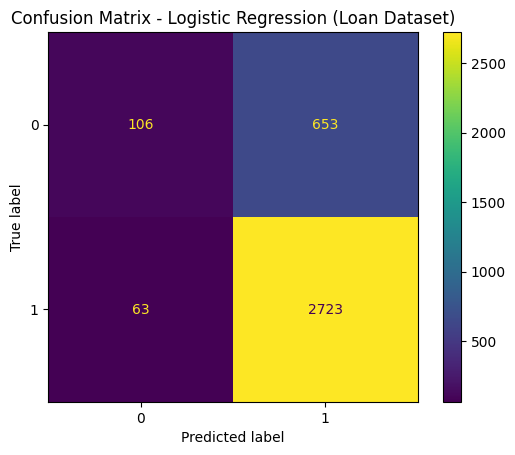

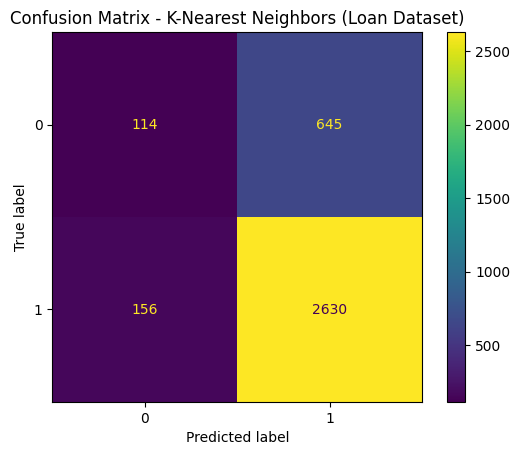

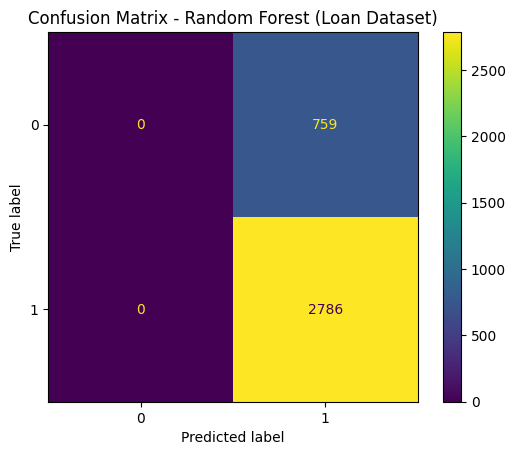

Fraud Dataset - ROC Curves and Confusion Matrices:


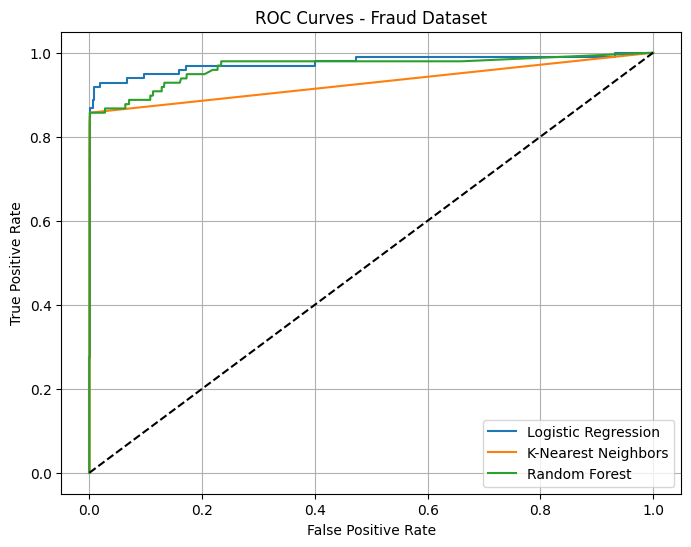

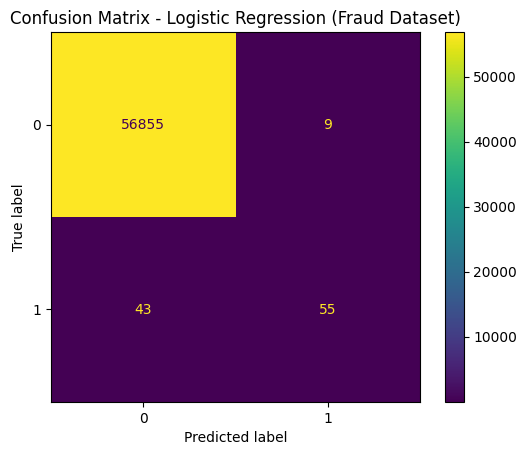

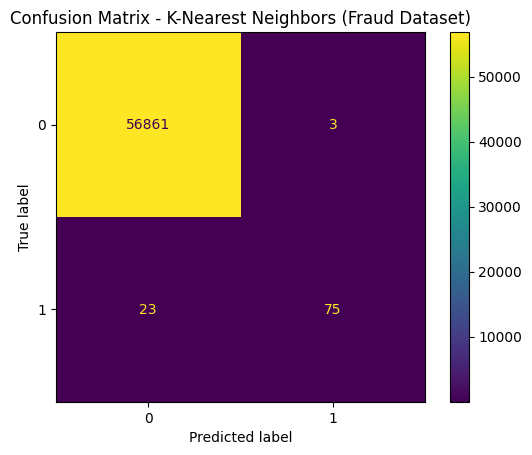

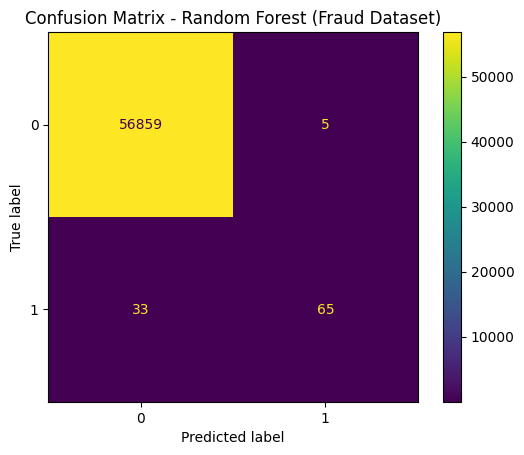

In [26]:
# ROC Curves and Confusion Matrices

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay

models_loan = {
    "Logistic Regression": best_lr_loan,
    "K-Nearest Neighbors": best_knn_loan,
    "Random Forest": best_rf_loan
}

models_fraud = {
    "Logistic Regression": best_lr_fraud,
    "K-Nearest Neighbors": best_knn_fraud,
    "Random Forest": best_rf_fraud
}

# ROC Curve
def plot_roc_curves(models, X_test, y_test, dataset_name):
    plt.figure(figsize=(8,6))
    for model_name, model in models.items():
        if hasattr(model, "predict_proba"):  # some models might not support it
            y_score = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_score)
            plt.plot(fpr, tpr, label=f"{model_name}")
    plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves - {dataset_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Confusion Matrix
def plot_confusion_matrices(models, X_test, y_test, dataset_name):
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title(f"Confusion Matrix - {model_name} ({dataset_name})")
        plt.grid(False)
        plt.show()

# Loan Dataset
print("Loan Dataset - Confusion Matrices:")
plot_confusion_matrices(models_loan, X_test_loan, y_test_loan, "Loan Dataset")

# Fraud Dataset
print("Fraud Dataset - ROC Curves and Confusion Matrices:")
plot_roc_curves(models_fraud, X_test_fraud, y_test_fraud, "Fraud Dataset")
plot_confusion_matrices(models_fraud, X_test_fraud, y_test_fraud, "Fraud Dataset")